In [29]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
#Loading the dataset
df= pd.read_csv("Uber.csv")
print (df.head())
#Basic summary statistics
print (df.shape)
print (df.describe())
print (df.info())

         Date       Open       High        Low      Close  Adj Close  \
0  2019-05-10  42.000000  45.000000  41.060001  41.570000  41.570000   
1  2019-05-13  38.790001  39.240002  36.080002  37.099998  37.099998   
2  2019-05-14  38.310001  39.959999  36.849998  39.959999  39.959999   
3  2019-05-15  39.369999  41.880001  38.950001  41.290001  41.290001   
4  2019-05-16  41.480000  44.060001  41.250000  43.000000  43.000000   

      Volume  
0  186322500  
1   79442400  
2   46661100  
3   36086100  
4   38115500  
(666, 7)
             Open        High         Low       Close   Adj Close  \
count  666.000000  666.000000  666.000000  666.000000  666.000000   
mean    40.505929   41.284923   39.617884   40.453799   40.453799   
std      9.441200    9.512602    9.305134    9.379623    9.379623   
min     15.960000   17.799999   13.710000   14.820000   14.820000   
25%     32.730000   33.328750   31.973249   32.767499   32.767499   
50%     39.865002   40.649999   38.975001   39.914999 

In [4]:
# Feature Engineering
df['Date']=pd.to_datetime(df['Date'])
df["Prev_close"]= df["Close"].shift(1)
target=[]
for i in range(len(df)):
    if i==0:
        target.append("high")
    else:
        if df.loc[i, "Prev_close"] > df.loc[i, "Close"]:
            target.append("high")
        else:
            target.append("low")
df["target"]= target
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_close,target
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,NaN,high
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,41.570000,high
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,37.099998,low
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,39.959999,low
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,41.290001,low


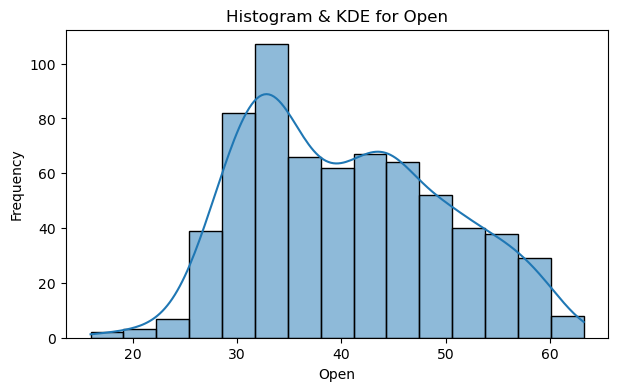

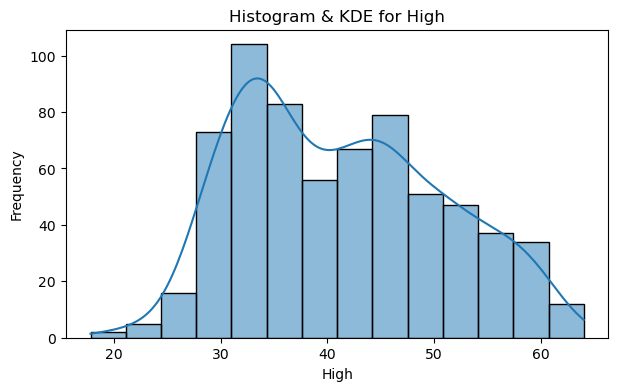

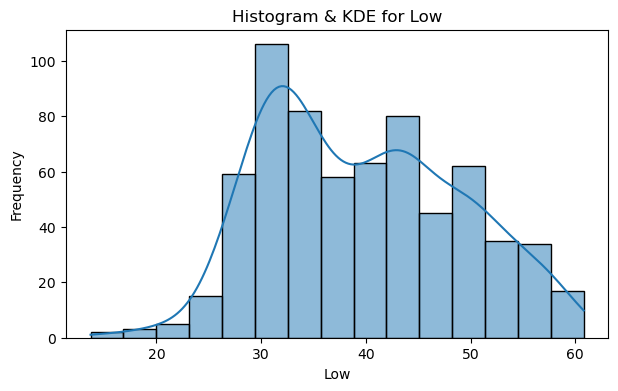

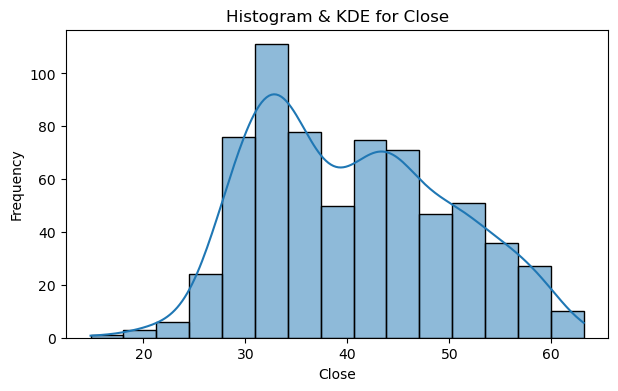

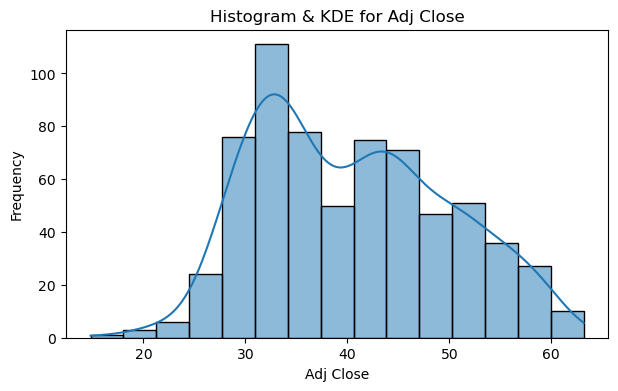

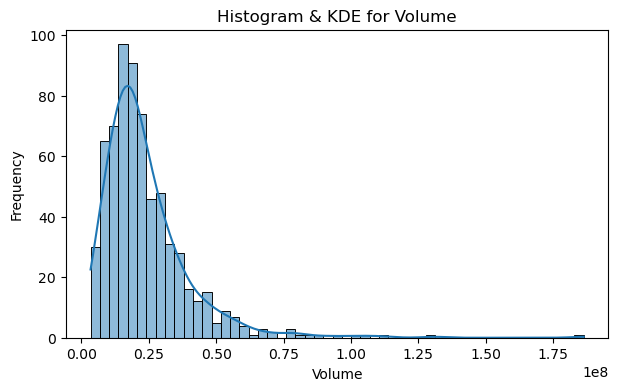

In [5]:
num_features=["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for feature in num_features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Histogram & KDE for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show

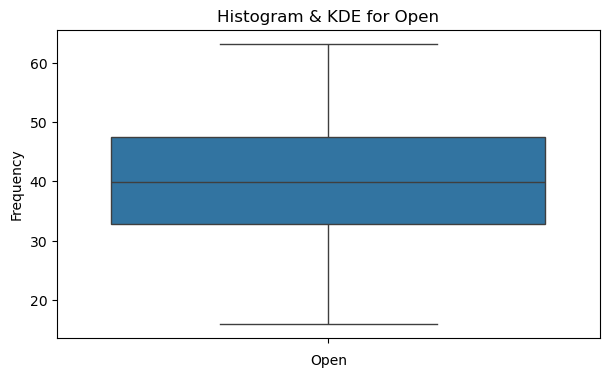

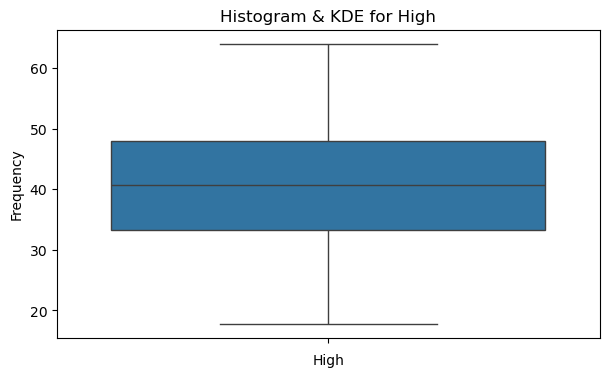

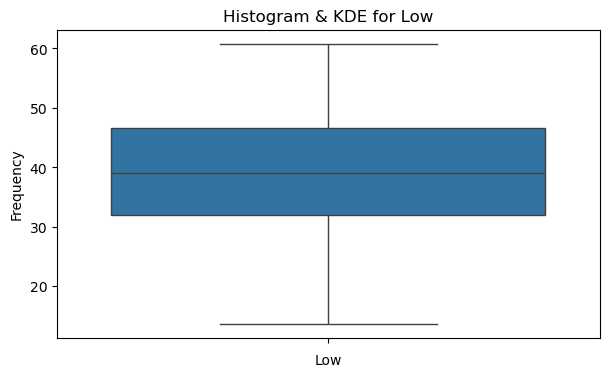

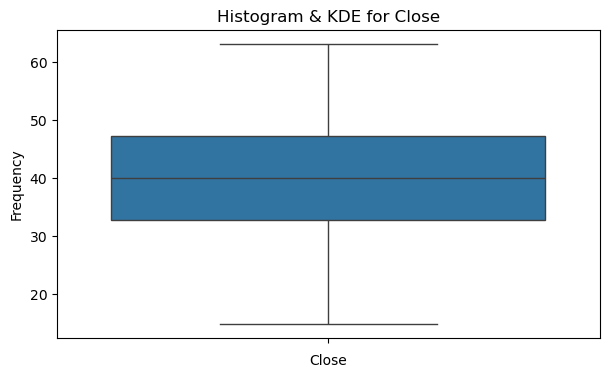

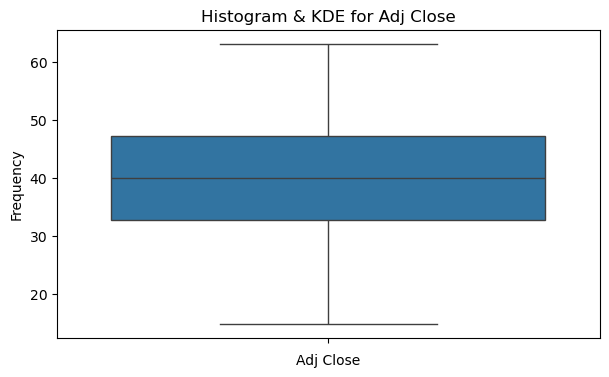

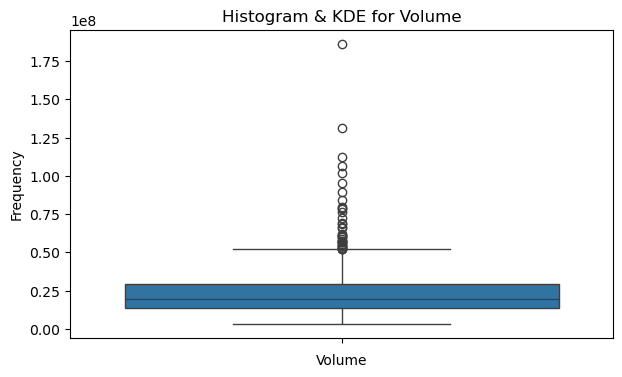

In [6]:
num_features=["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for feature in num_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(y=feature, data=df)
    plt.title(f"Histogram & KDE for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show

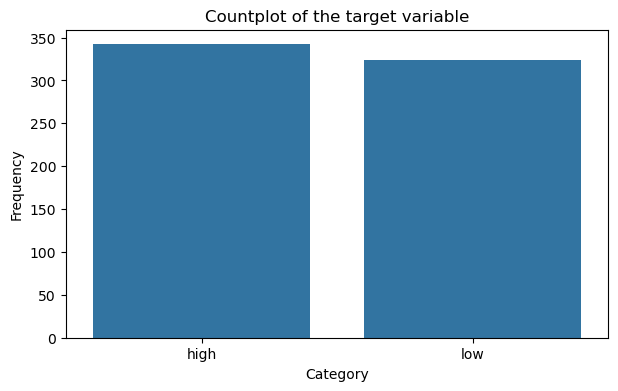

In [7]:
plt.figure(figsize=(7,4))
sns.countplot(x= "target", data=df)
plt.title ("Countplot of the target variable")
plt.xlabel ("Category")
plt.ylabel ("Frequency")
plt.show()

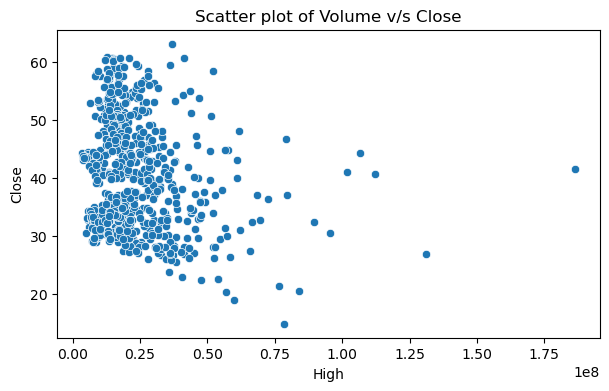

In [8]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x="Volume", y="Close")
plt.xlabel("High")
plt.ylabel ("Close")
plt.title("Scatter plot of Volume v/s Close")
plt.show()

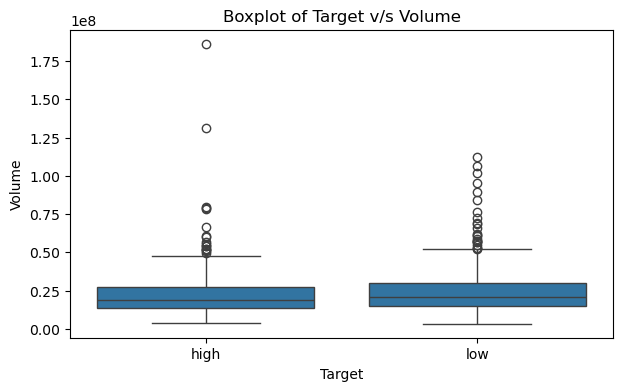

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot (x="target", y="Volume", data=df)
plt.title("Boxplot of Target v/s Volume")
plt.xlabel("Target")
plt.ylabel("Volume")
plt.show()

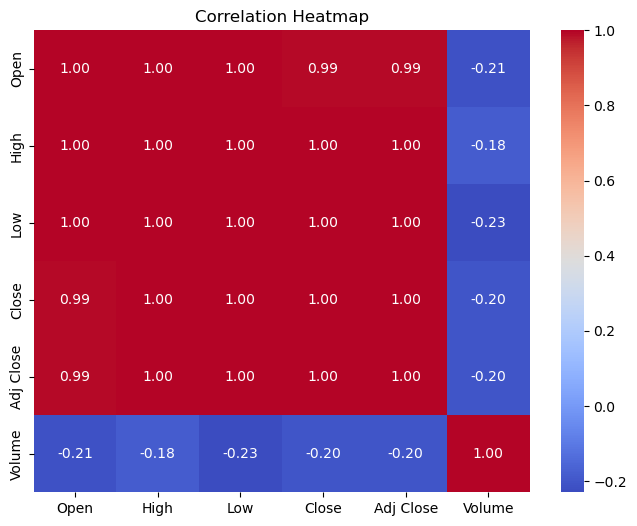

In [10]:
correlation_matrix=df[num_features].corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt= '.2f')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
df[num_features] = scalar.fit_transform(df[num_features])

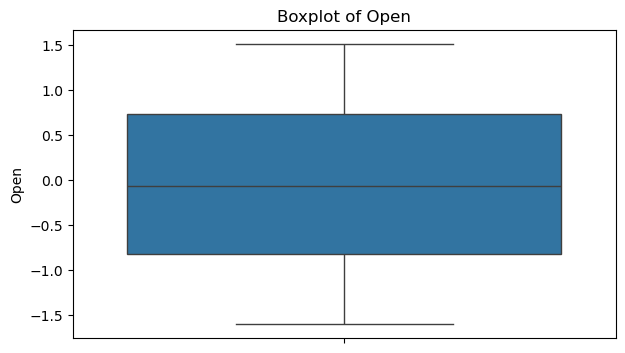

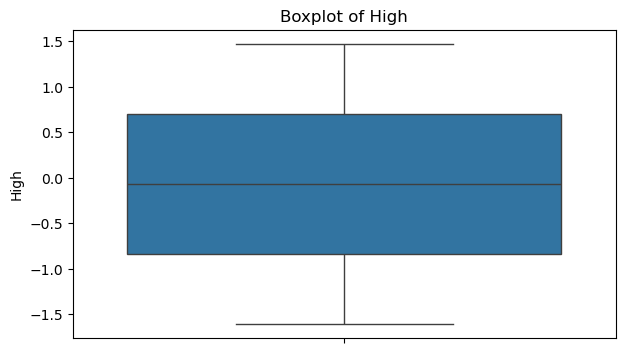

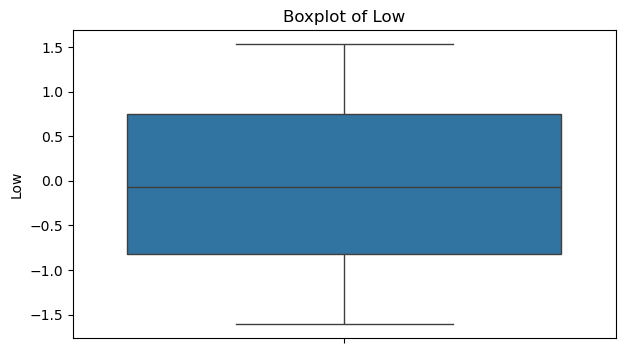

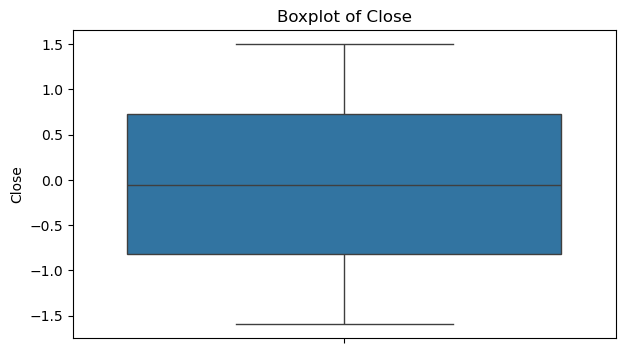

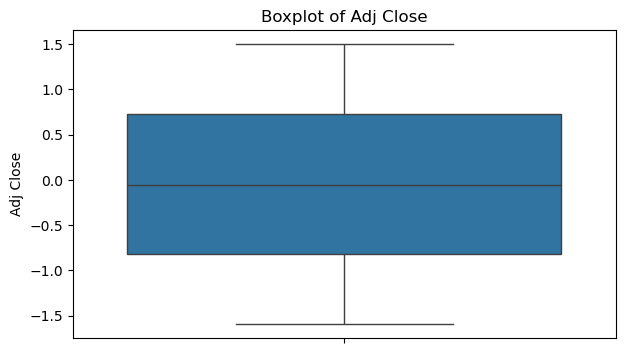

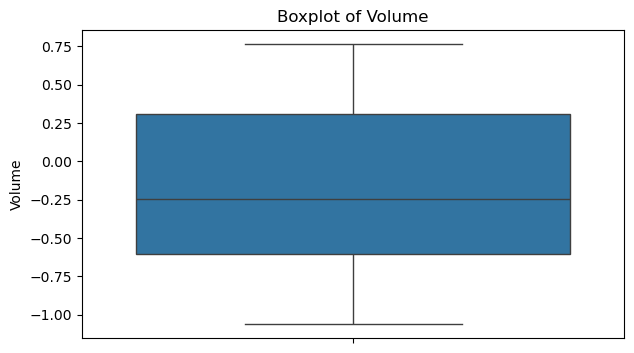

In [13]:
#Outlier handling for all numeric features
for feature in num_features:
    Q1= df[feature].quantile(0.25)
    Q3= df[feature].quantile(0.75)
    IQR= Q1-Q3
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    df[feature]= df[feature].clip(lower_bound, upper_bound)
for feature in num_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(y=feature, data=df)
    plt.title (f"Boxplot of {feature}")
    plt.show()

In [15]:
#Feature Selection and Accuracy Score using Filter Based Approach
X= df[num_features]
y= df['target']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)
selector= SelectKBest(score_func=f_classif, k=4)
X_train_filtered= selector.fit_transform(X_train, y_train)
X_test_filtered= selector.transform(X_test)
selected_features= X_train.columns[selector.get_support()]
print ("Selected Features:", selected_features)

model=LogisticRegression()
model.fit(X_train_filtered, y_train)
y_pred=model.predict(X_test_filtered)
print ("ACCURACY SCORE: ", accuracy_score(y_test, y_pred))

Selected Features: Index(['Open', 'Close', 'Adj Close', 'Volume'], dtype='object')
ACCURACY SCORE:  0.76


In [21]:
#FEATURE SELECTION USING WRAPPER METHOD
model= LogisticRegression()
RFE= RFE(estimator=model, n_features_to_select=4)
RFE.fit(X_train, y_train)
print ("Selected Features: ", X_train.columns[RFE.support_])
X_train_rfe = RFE.transform(X_train)
X_test_rfe  = RFE.transform(X_test)
model.fit(X_train_rfe, y_train)
y_pred_rfe= model.predict(X_test_rfe)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rfe))

Selected Features:  Index(['Open', 'Low', 'Close', 'Adj Close'], dtype='object')
Accuracy Score:  0.8


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

accuracy = pipe.score(X_test, y_test)
print("LDA + Logistic Accuracy:", accuracy)

LDA + Logistic Accuracy: 0.8
